In [23]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [24]:
file_name = '/home/jhermiz/data/aer/OriginsOfECoG/R18_B12.h5'
f1 = h5py.File(file_name, 'r')
f1

<HDF5 file "R18_B12.h5" (mode r)>

In [25]:
dset = f1.get('power_spectra')

In [26]:
data = dset.value
data.shape

<ipython-input-26-10a932b1a3f7>:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = dset.value


(64, 54)

In [27]:
file_name = '/home/jhermiz/data/aer/OriginsOfECoG/simulation_ecp_layers.nwb'
f2 = h5py.File(file_name, 'r')
dset2 = f2.get('scratch')
freq = dset2['freqs'].value
freq.shape

<ipython-input-27-1ce27333fbfc>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  freq = dset2['freqs'].value


(54,)

In [28]:
sim_data = dset2['spectrum_ch_0'].value
sim_data.shape

<ipython-input-28-ae26d835421f>:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  sim_data = dset2['spectrum_ch_0'].value


(54,)

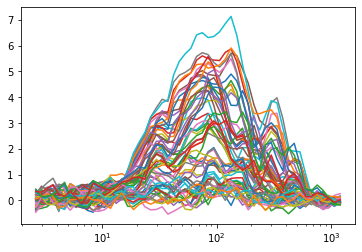

In [29]:
plt.semilogx(freq, data[:, :].T)
pass

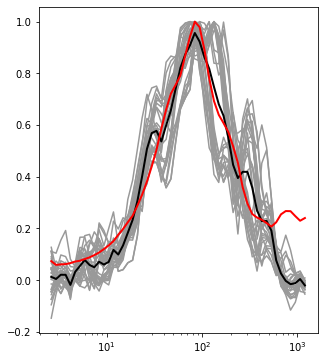

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
data_max = np.max(data, axis=1)
data_norm = np.zeros_like(data)
for idx in range(64):
    if data_max[idx] > 3:
        data_norm[idx, :] = data[idx, :]/data_max[idx]
    else:
        data_norm[idx, :] = -11
mask = data_norm[:, 0] > -10
data_norm = data_norm[mask, :]
data_mean = np.mean(data_norm, axis=0)
ax.semilogx(freq, data_norm.T, color=0.6*np.ones(3))
ax.semilogx(freq, data_mean, 'black', linewidth=2)
sim_data_norm = sim_data/np.max(sim_data)
ax.semilogx(freq, sim_data_norm, 'red', linewidth=2)
pass

In [31]:
f1.close()
f2.close()

## Find the right sim

In [14]:
root_path = '/home/jhermiz/data/aer/OriginsOfECoG/'

In [15]:
def open_file(path):
    fh = h5py.File(path, 'r')    
    return fh

In [16]:
fire_rates = [20, 23, 26, 29, 32, 38, 44]
sim_data_list = []
for rate in fire_rates:
    file_name = f'ampl_vary_{rate}hz.nwb'
    fh = open_file(os.path.join(root_path, file_name))
    dset = fh.get('scratch')
    sim_data = dset['spectrum_ch_0'].value
    sim_data_list.append(sim_data)
    fh.close()
freq = dset['freqs'].value

<ipython-input-16-6d0d9b0a542c>:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  sim_data = dset['spectrum_ch_0'].value


ValueError: Not a location (invalid object ID)

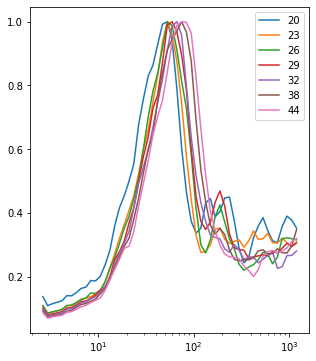

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))

for idx, sim_data in enumerate(sim_data_list):    
    sim_data_norm = sim_data/np.max(sim_data)
    ax.semilogx(freq, sim_data_norm, label=fire_rates[idx])
ax.legend()